# Introduction

Use a bigger dataset. Work with larger datasets helps with overfitting. 
https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C2/W1/ungraded_lab/C2_W1_Lab_1_cats_vs_dogs.ipynb



--2022-06-25 23:17:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.128, 173.194.198.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   177MB/s    in 0.4s    

2022-06-25 23:17:04 (177 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']
['cat.6.jpg', 'cat.633.jpg', 'cat.426.jpg', 'cat.494.jpg', 'cat.99.jpg', 'cat.917.jpg', 'cat.5.jpg', 'cat.423.jpg', 'cat.73.jpg', 'cat.602.jpg']
['dog.85.jpg', 'dog.298.jpg', 'dog.284.jpg', 'dog.86.jpg', 'dog.130.jpg', 'dog.5

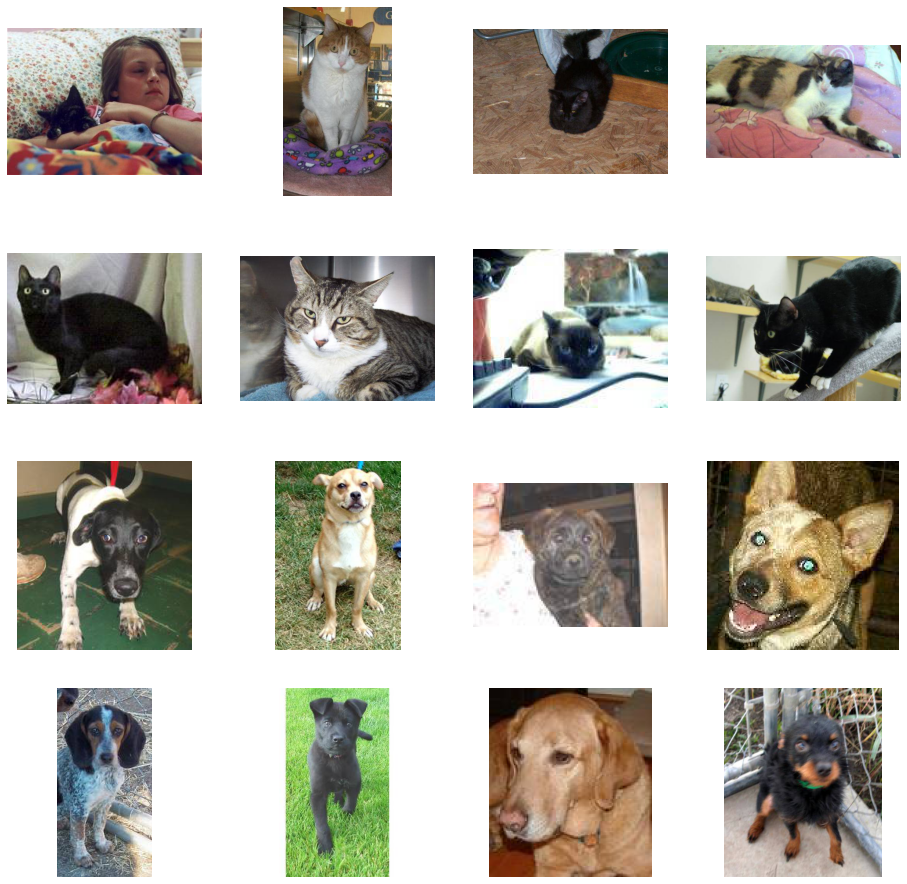

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 - 66s - loss: 0.8306 - accuracy: 0.5705 - val_loss: 0.6472 - val_accuracy: 0.6530 - 66s/epoch - 662ms/step
Epoch 2/15
100/100 - 63s - loss: 0.6137 - accuracy: 0.6805 - val_loss: 0.6075 - val_accuracy: 0.6940 - 63s/epoch - 631ms/step
Epoch 3/15
100/100 - 61s - loss: 0.5564 - accuracy: 0.7260 - val_loss: 0.5632 - val_accuracy: 0.7270 - 61s/epoch - 611ms/step
Epoch 4/15
100/100 - 61s - loss: 0.4795 - accuracy: 0.7715 - val_loss: 0.6730 - val_accuracy: 0.6640 - 61s/epoch - 612ms/step
Epoch 5/15
100/100 - 62s - loss: 0.3942 - accuracy: 0.8245 - val_loss: 0.6042 - val_accuracy: 0.7110 - 62s/epoch - 620ms/step
Epoch 6/15
100/100 - 61s - loss: 0.2819 - accuracy: 0.8825 - val_loss: 0.7953 - val_accuracy: 0.7260 - 61s/epoch - 612ms/step
Epoch 7/15
100/100 - 62s - loss: 0.2193 - accuracy: 0.9070 - val_loss: 0.7375 - val_accuracy: 0.7130 - 62s/epoch - 623ms/step
Epoch 8/15
100/100 - 61s - loss: 0

In [ ]:
#Download file

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

#extract to current directory

import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )